In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Load Dataset and drop unnecessary columns

In [2]:
data = pd.read_csv('bank.csv', sep=';')
cols_to_remove = ['day', 'month'] # dropping 2 columns, because pdays captures this information
data = data.drop(columns = cols_to_remove)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no


# Encoding Categorical and Binary columns

In [3]:
categorical_columns = [
    'job',
    'marital',
    'education',
    'contact',
    'poutcome',
]

binary_columns = [
    'default',
    'housing',
    'loan',
    'y',
]

cat_encoded_df = pd.get_dummies(data[categorical_columns])

data = pd.concat([data, cat_encoded_df], axis=1)
data = data.drop(columns = categorical_columns)

for col in binary_columns:
    data[col] = data[col].map({'yes':1, 'no':0})

data.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,79,1,-1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,33,0,4789,1,1,220,1,339,4,0,...,1,0,0,1,0,0,1,0,0,0
2,35,0,1350,1,0,185,1,330,1,0,...,0,1,0,1,0,0,1,0,0,0
3,30,0,1476,1,1,199,4,-1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,59,0,0,1,0,226,1,-1,0,0,...,1,0,0,0,0,1,0,0,0,1


# Feature Scaling for numerical columns

In [4]:
numerical_columns = [
    'age',
    'balance',
    'duration',
    'pdays',
]

z_transform = StandardScaler()
z_transformed_df = pd.DataFrame(z_transform.fit_transform(data[numerical_columns]))

i=0
for col in numerical_columns:
    data[col] = z_transformed_df[i]
    i+=1

data.sample(5)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1294,0.551289,0,-0.403302,1,0,-0.496334,2,-0.407218,0,0,...,0,0,1,0,0,1,0,0,0,1
1123,-0.583458,0,-0.410280,0,0,0.084820,2,-0.407218,0,0,...,0,1,0,1,0,0,0,0,0,1
336,-0.772583,0,-0.537552,0,0,-0.981270,1,-0.407218,0,0,...,0,0,0,0,0,1,0,0,0,1
1410,0.740414,0,-0.384693,1,0,0.038636,6,-0.407218,0,0,...,1,0,0,0,0,1,0,0,0,1
936,0.834976,0,0.122069,0,1,1.862921,3,-0.407218,0,0,...,0,1,0,1,0,0,0,0,0,1


# Segregate independent and dependent variables

In [5]:
independent_cols = [x for x in data.columns.tolist() if x != 'y']
dependent_col = 'y'

data = data[independent_cols + list(dependent_col)]

X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

# Split train and test data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Neural Network model

In [7]:
# define the keras model
model = Sequential()
model.add(Dense(35, input_dim=X.shape[1], activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

# fit the keras model on the dataset
train_history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
3616/3616 [==============================] - 1s 236us/step - loss: 0.3403 - binary_accuracy: 0.8838
Epoch 2/30
3616/3616 [==============================] - 0s 53us/step - loss: 0.2597 - binary_accuracy: 0.8916
Epoch 3/30
3616/3616 [==============================] - 0s 53us/step - loss: 0.2476 - binary_accuracy: 0.8974
Epoch 4/30
3616/3616 [==============================] - 0s 51us/step - loss: 0.2415 - binary_accuracy: 0.9015
Epoch 5/30
3616/3616 [==============================] - 0s 52us/step - loss: 0.2364 - binary_accuracy: 0.9062
Epoch 6/30
3616/3616 [==============================] - 0s 54us/step - loss: 0.2351 - binary_accuracy: 0.9057
Epoch 7/30
3616/3616 [==============================] - 0s 52us/step - loss: 0.2318 - binary_accuracy: 0.9074
Epoch 8/30
3616/3616 [==============================] - 0s 51us/step - loss: 0.2285 - binary_accuracy: 0.9093
Epoch 9/30
3616/3616 [==============================] - 0s 50us/step - loss: 0.2289 - binary_accuracy: 0.9101
Epoch 10/

# Evaluate Model (Accuracy and Confusion Matrix)

In [8]:
y_pred = model.predict_classes(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy Score of model is {acc} %')

Accuracy Score of model is 88.61878453038673 %


In [9]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[ 37  61]
 [ 42 765]]


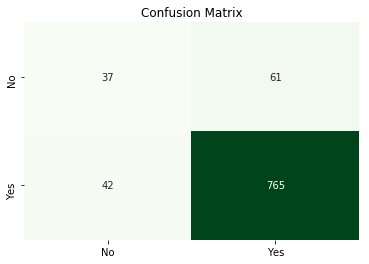

In [10]:
sns.heatmap(cm, annot=True, cmap='Greens', cbar=None, xticklabels=['No','Yes'], yticklabels=['No','Yes'], fmt='d')
plt.title('Confusion Matrix')
plt.show()

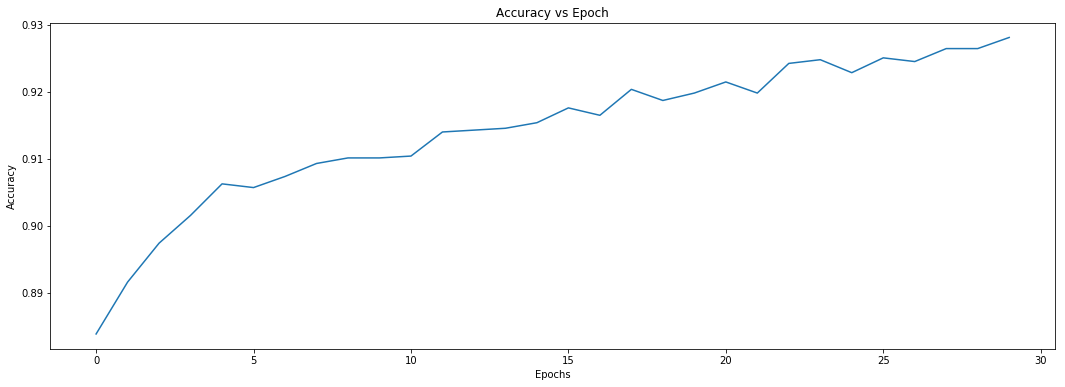

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
plt.plot(train_history.epoch,train_history.history['binary_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.show()

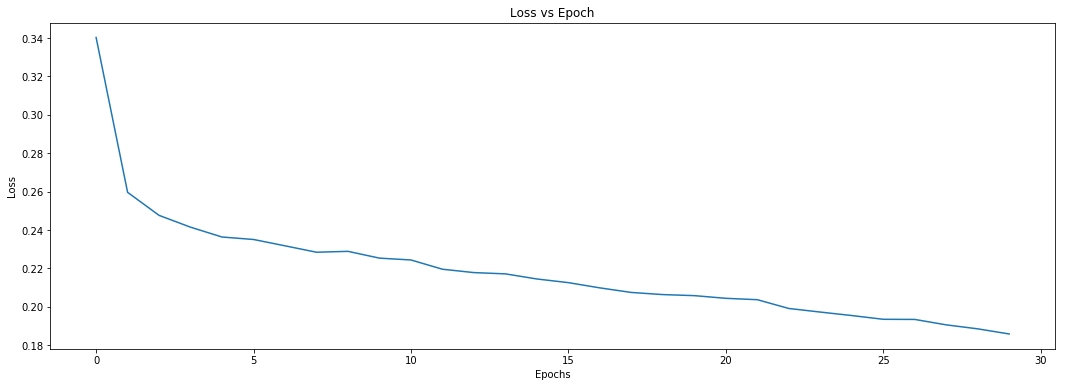

In [12]:
plt.figure(figsize=(18,6))
plt.plot(train_history.epoch,train_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()